**Redes Neurais Convolucionais**

**Exercício #4**

Utilizando o dataset Fashion MNIST, construa uma CNN para a classificação do dataset.

Dicas:

• Utilize a LetNet-5 como exemplo bem como o exemplo visto em sala de aula do dataset minst.

• Utilize o comando (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() para carregar o dataset.

• Os labels da classe são os seguintes:

0 T-shirt/top | 1 Trouser | 2 Pullover | 3 Dress | 4 Coat | 5 Sandal      | 6 Shirt   | 7 Sneaker  | 8 Bag   | 9 Ankle boot

In [12]:
#Importando as bibliotecas
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
#from keras.preprocessing.image import img_to_array, load_img
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [13]:
#Carrega os dados do dataset Minst
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
labels = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'  ]

In [15]:
# ver a dimensionalidade dos DataFrames
print("Dimensionalidade dos DataFrames:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Dimensionalidade dos DataFrames:
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


Imagem convertida em array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


In [16]:
# verificar os valores únicos por classes (treino)
print("y_train_orig:")
np.unique(y_train, return_counts=True)

y_train_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [17]:
# verificar os valores únicos por classes (teste)
print("y_test_orig:")
np.unique(y_test, return_counts=True)

y_test_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

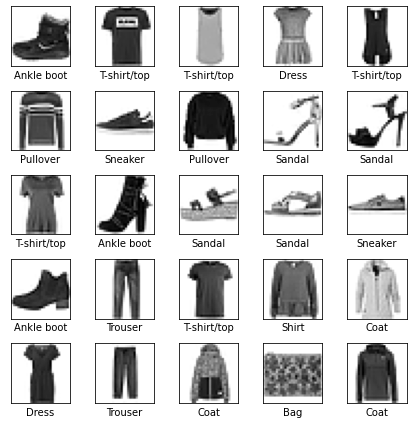

In [18]:
# ver algumas imagens de exemplo
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.tight_layout()

In [19]:
# ver uma fatia de uma imagem
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [20]:
# criar função lambda que transforma em float32 e normaliza os pixels
# Normaliza as entradas de 0-255 para 0-1
f = lambda x: (x / 255.0).astype("float32")

# aplicar a função lambda aos datasets X_train e X_test
X_train = f(X_train)
X_test = f(X_test)

In [21]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("X_train:{}".format(X_train.shape))
print("X_test:\t{}".format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:	(10000, 28, 28, 1)


In [22]:
# Gera os vetores com as classes do conjunto de dados de treinamento e teste
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#converter vetor y em variaveis binárias (to.category)
num_classes = y_test.shape[1]

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
# baseado na implementação da MiniVGGNet do Adrian Rosebroke
# primeiro fizemos: CONV => RELU => CONV => RELU => POOL layer set
# Cria o modelo
model = keras.models.Sequential()
#Convolução 2D com função de ativação 
#32 imagens de tamanho de 3/3 
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
#Camada de Pooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# segundo: CONV => RELU => CONV => RELU => POOL layer set
#64 filtros com tamanho de 3/3
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# terceiro: (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# ultima camada de softmax classifier (segmmoid probabilistica)
model.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# treinar o modelo e salvar as informações em history
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 20s 8ms/step - loss: 0.5269 - accuracy: 0.8185 - val_loss: 0.3442 - val_accuracy: 0.8776
Epoch 2/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3342 - accuracy: 0.8806 - val_loss: 0.2994 - val_accuracy: 0.8926
Epoch 3/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.2887 - accuracy: 0.8948 - val_loss: 0.2569 - val_accuracy: 0.9079
Epoch 4/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.2714 - accuracy: 0.9035 - val_loss: 0.2361 - val_accuracy: 0.9164
Epoch 5/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.2526 - accuracy: 0.9075 - val_loss: 0.2477 - val_accuracy: 0.9115
Epoch 6/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2383 - accuracy: 0.9136 - val_loss: 0.2301 - val_accuracy: 0.9207
Epoch 7/10
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2251 - accuracy: 0.9186 - val_loss: 0.2004 - val_ac

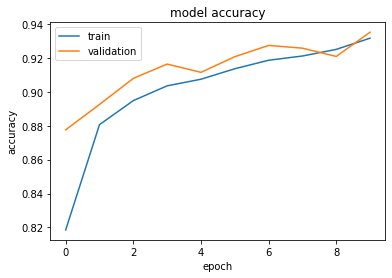

In [29]:
#Plota o grafico com a acuracia
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
#Erro e Acuracia
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 7.33%
Acurária da CNN: 92.67%


In [31]:
scores

[0.2113971710205078, 0.9266999959945679]

In [32]:
model.save('MNIST.hdf5')

In [33]:
model_loaded  = load_model('MNIST.hdf5')